In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [4]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv',usecols=['Pclass','Sex','Age','SibSp','Parch','Fare','Survived'])

In [5]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [8]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [9]:
change_sex={
    'male':1,
    'female':2
}

In [10]:
titanic['Sex']=titanic['Sex'].map(change_sex)

In [11]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,2,38.0,1,0,71.2833
2,1,3,2,26.0,0,0,7.9250
3,1,1,2,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [13]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
x = titanic.drop(columns = 'Survived')
y = titanic['Survived']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state= 355)

In [16]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
feature_name
class_name

[1, 0]

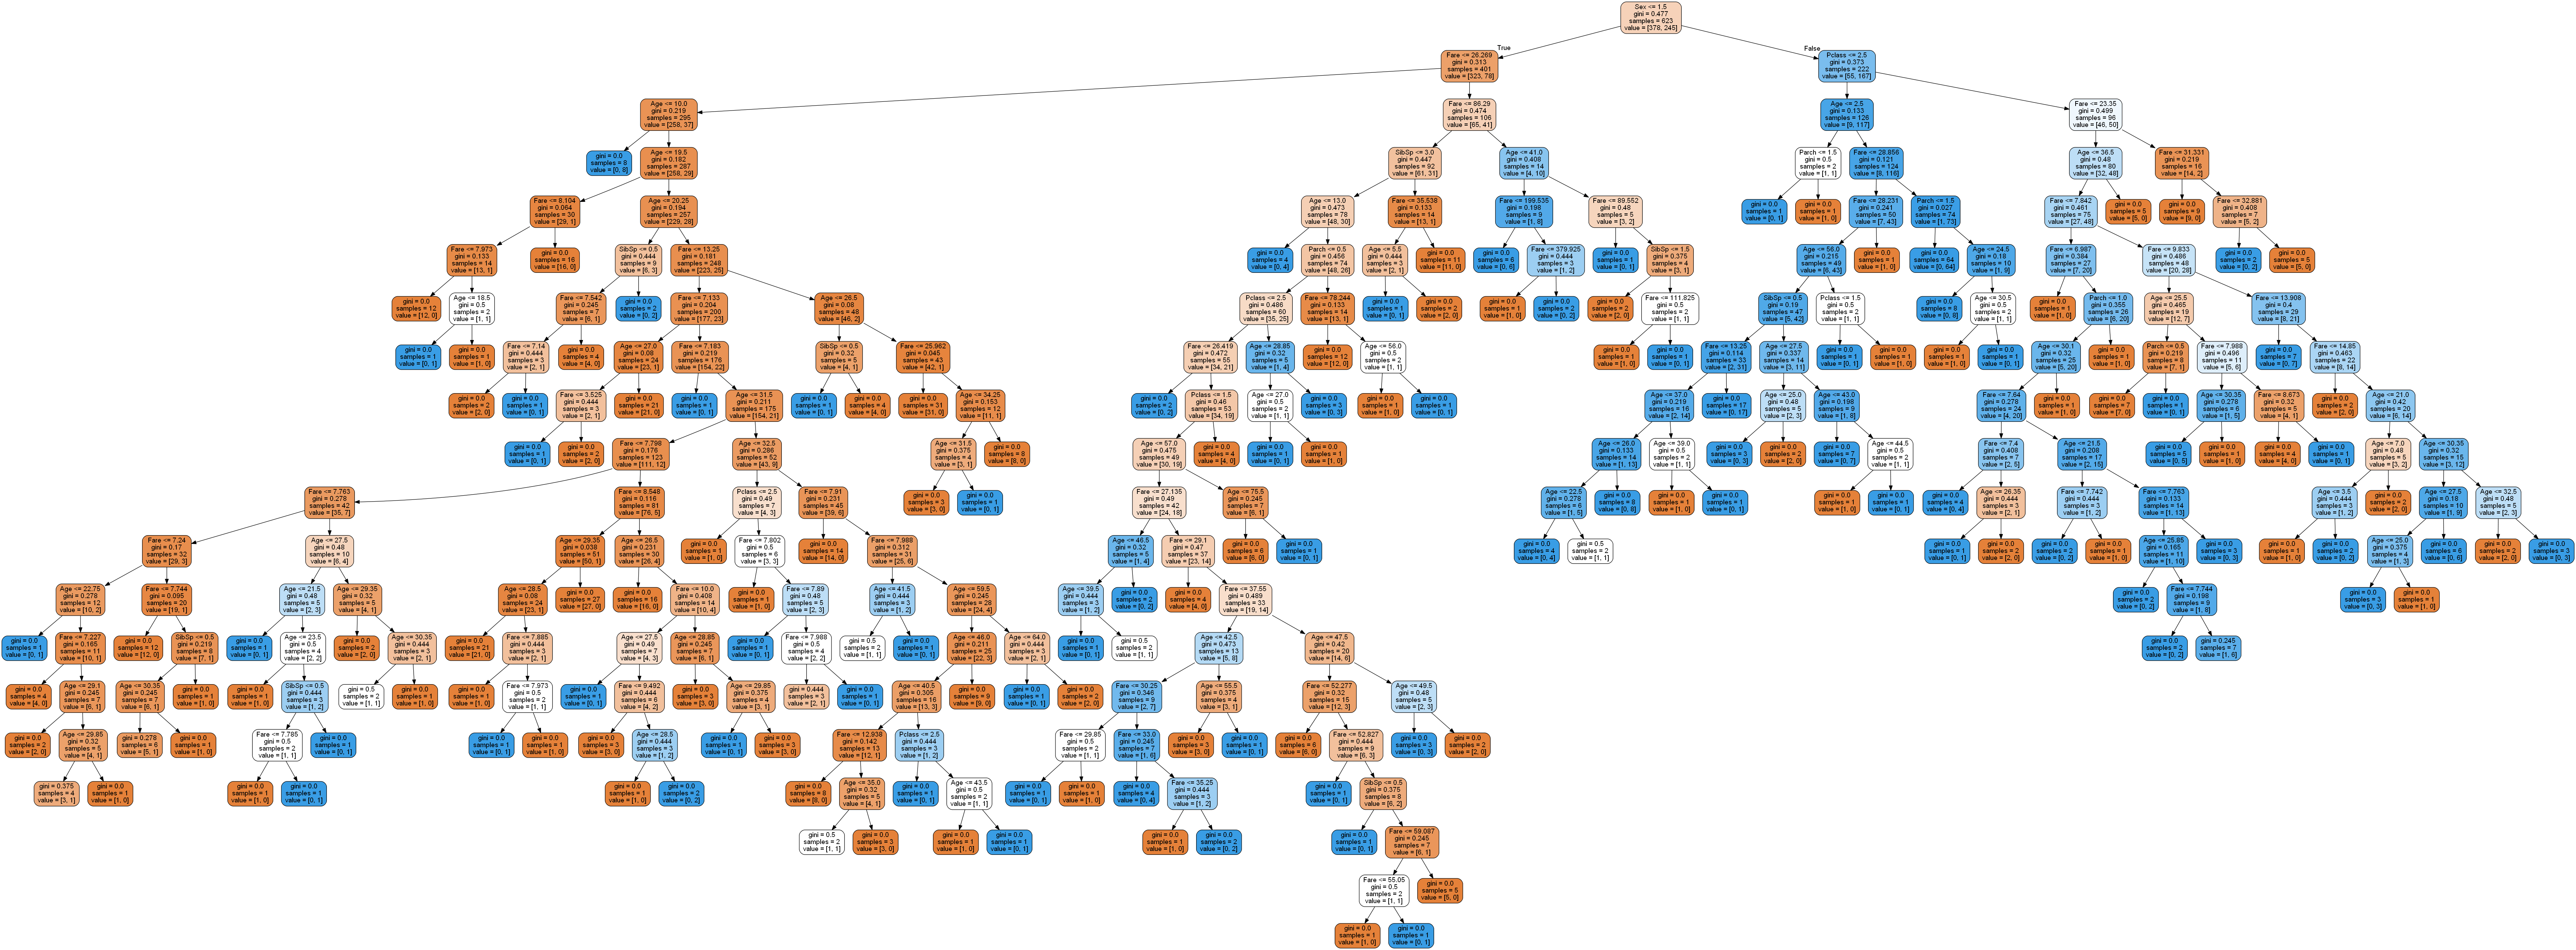

In [18]:
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [19]:
clf.score(x_train,y_train)

0.985553772070626

In [20]:
py_pred = clf.predict(x_test)
py_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [21]:
clf.score(x_test,y_test)

0.7425373134328358

# Grid search CV

In [22]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [23]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [24]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}


In [26]:
grid_search.best_score_

0.8250401284109149

In [27]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =8, min_samples_leaf= 3, min_samples_split= 8, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [28]:
clf.score(x_train,y_train)

0.8539325842696629

In [29]:
clf.score(x_test,y_test)

0.8059701492537313

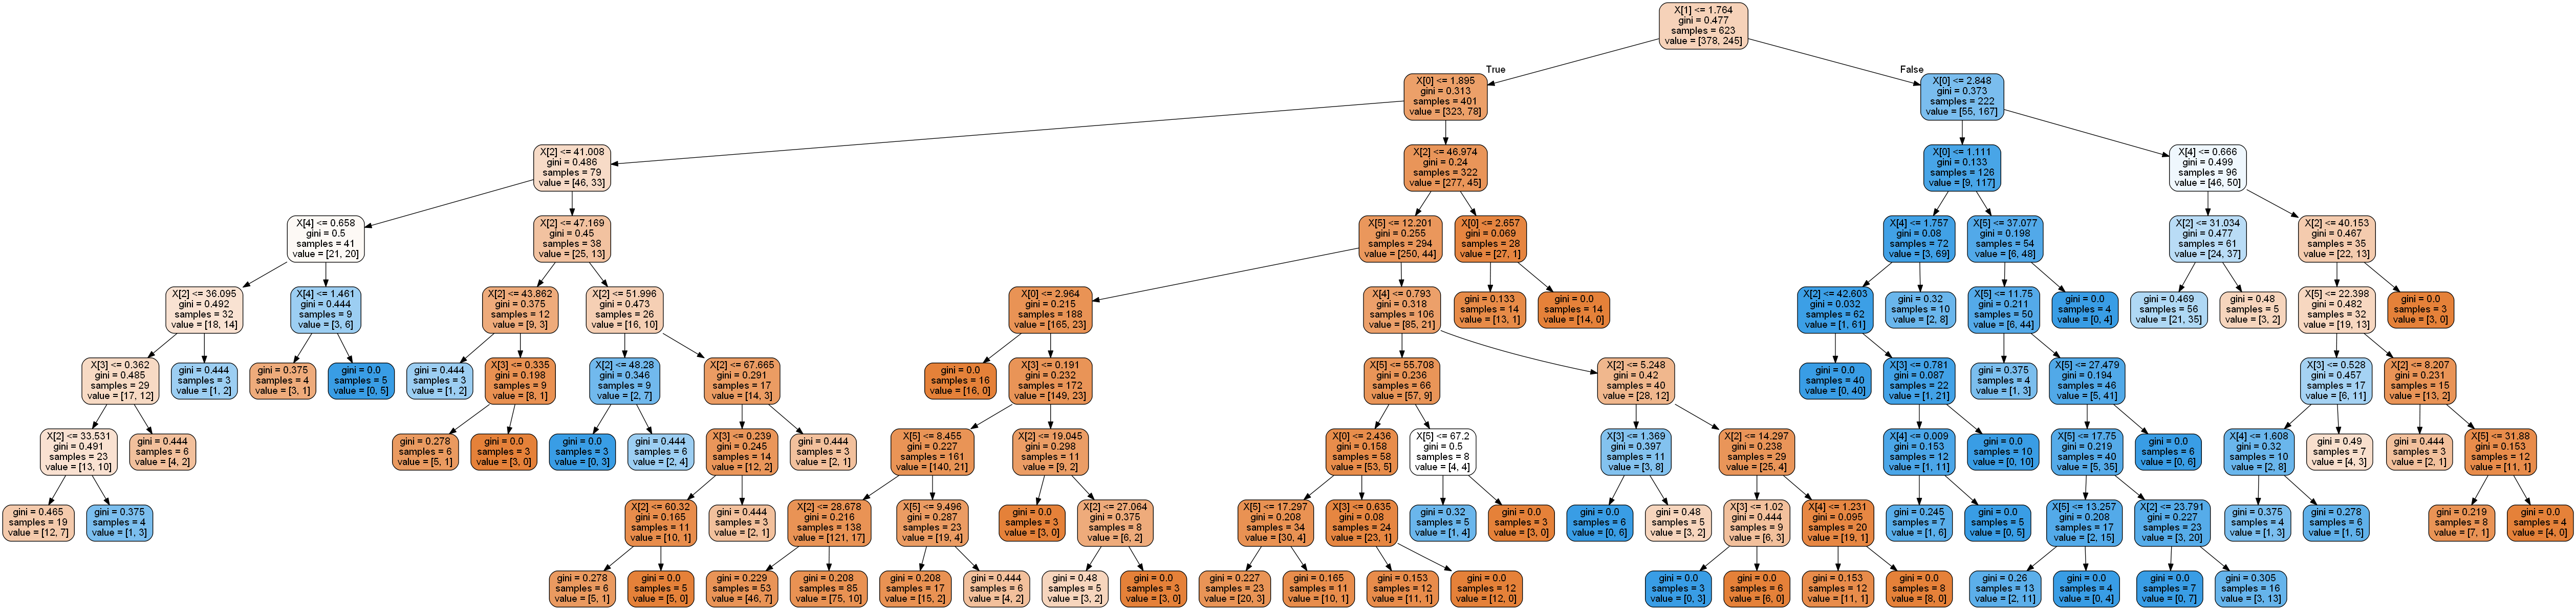

In [30]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

# Randomize search CV

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt','log2']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10,14]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4,6,8]
# # Create the random grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 7),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#               'criterion':['entropy','gini']}
print(param_dist)

{'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000296CE358748>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000296CE8BFC48>, 'criterion': ['gini', 'entropy']}


In [38]:
clf = DecisionTreeClassifier()
# clf_randomcv=RandomizedSearchCV(estimator=clf,param_distributions=param_dist,n_iter=100,cv=3,verbose=2,
#                                random_state=100,n_jobs=-1)
clf_randomcv=RandomizedSearchCV(clf, param_dist, cv=5)
clf_randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000296CE358748>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000296CE8BFC48>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [40]:
clf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 7}

In [41]:
clf_randomcv.score(x_train,y_train)

0.797752808988764

In [42]:
clf_randomcv.score(x_test,y_test)

0.8022388059701493